In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
df.drop('Unnamed: 15', axis=1, inplace=True)
df.drop('Unnamed: 16', axis=1, inplace=True)

# É possível que no seu arquivo o separador de valores seja "," e o separador decimal seja ".".
# Se você obter erros verifique a formatação do seu arquivo e substitua as linhas
# acima por apenas (não precisa excluir as colunas unnamed):
# df = pd.read_csv('AirQualityUCI.csv', sep=',', decimal='.')


df.replace(-200,pd.NA, inplace=True)  # Na geração desses dados, foi escolhido usar o valor -200 para indicar
                                      # valores ausentes.

df.drop('NMHC(GT)',axis=1, inplace=True)  # Essa coluna possui dados de Hidrocarbonetos não-metano (NMHC).
                                          # Porém ~90% dos valores são nulos e vamos eliminá-la por completo

df["Time"] = df["Time"].str.replace(".",":", regex=False)

# Trocamos as coluna Date e Time por uma única coluna chamada Datetime
df["Datetime"]= pd.to_datetime(df["Date"] + " " + df["Time"],
                               format = "%d/%m/%Y %H:%M:%S")
df.drop(["Date","Time"], axis=1, inplace=True)

# Garantimos que todas as colunas numéricas sejam tratadas como tal
for col in df.columns:
  if col!="Datetime":
    df[col] = pd.to_numeric(df[col], errors="coerce")


#df.dropna(inplace=True)
df = df.interpolate()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9471 non-null   float64       
 1   PT08.S1(CO)    9471 non-null   float64       
 2   C6H6(GT)       9471 non-null   float64       
 3   PT08.S2(NMHC)  9471 non-null   float64       
 4   NOx(GT)        9471 non-null   float64       
 5   PT08.S3(NOx)   9471 non-null   float64       
 6   NO2(GT)        9471 non-null   float64       
 7   PT08.S4(NO2)   9471 non-null   float64       
 8   PT08.S5(O3)    9471 non-null   float64       
 9   T              9471 non-null   float64       
 10  RH             9471 non-null   float64       
 11  AH             9471 non-null   float64       
 12  Datetime       9471 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 962.0 KB
None


            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9471.000000  9471.000000  9471.000000    9471.000000  9471.000000   
mean      2.131438  1102.673846    10.199868     943.404762   242.199979   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.100000   939.000000     4.500000     739.000000    96.057823   
50%       1.800000  1071.000000     8.400000     914.000000   181.727273   
75%       2.900000  1236.000000    14.000000    1117.000000   323.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   
std       1.423113   216.907224     7.460870     266.494895   203.097172   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9471.000000  9471.000000   9471.000000   9471.00000  9471.000000   
mean     830.607222   110.334653   1449.395312   1029.93781    18.356984   
min      322.000000     2.000000    551.000000    221.00000    -1.900000   
25%      65

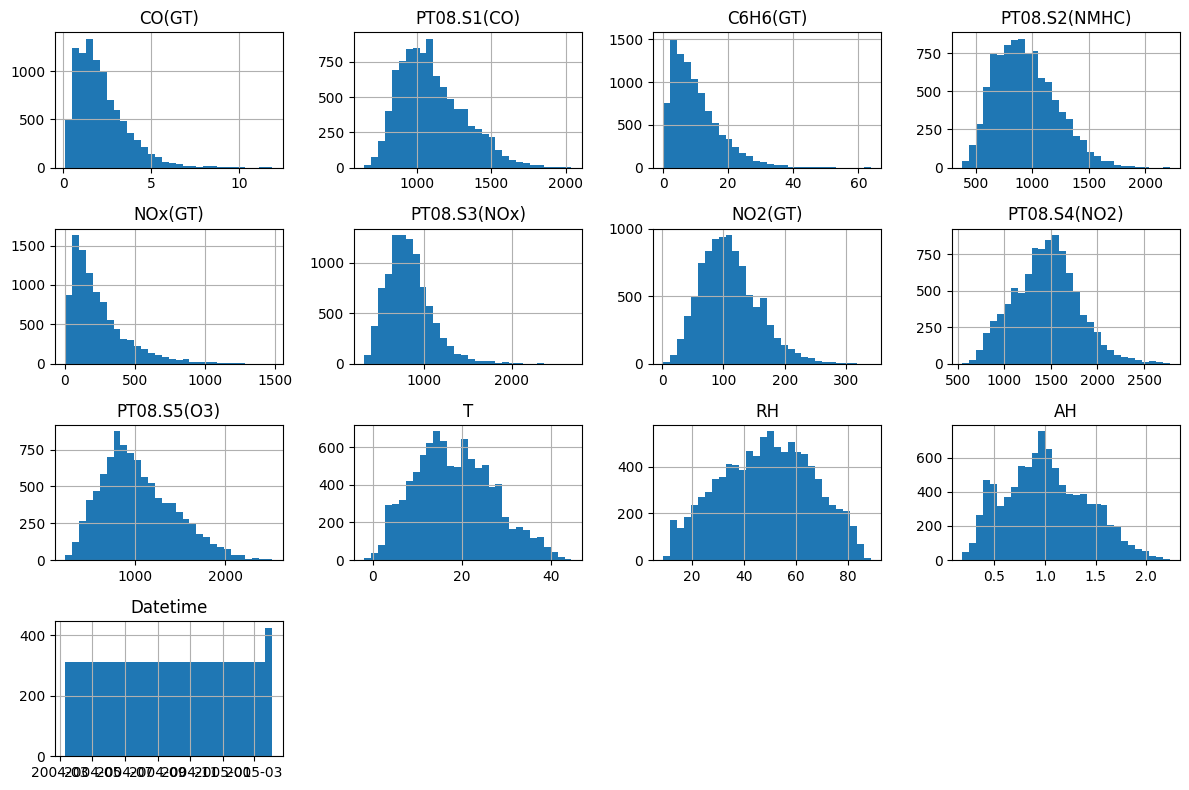

In [10]:
print(df.describe())
df.hist(figsize=(12,8) ,  bins=30)
plt.tight_layout()
plt.show()

<Axes: xlabel='FDS', ylabel='CO(GT)'>

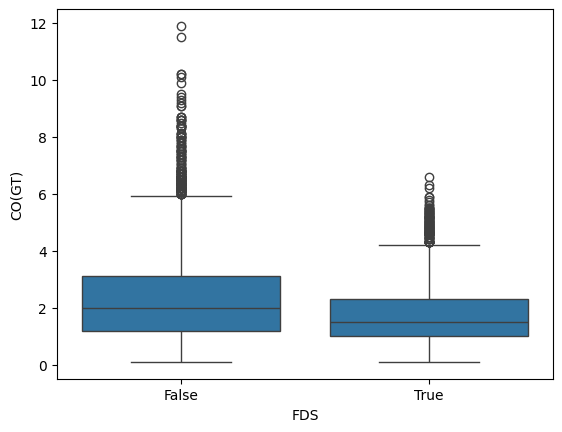

In [11]:
df["DDS"] = df["Datetime"].dt.dayofweek  # Segunda=0, Domingo=6

df["FDS"] = df["DDS"] >= 5  # Sábado(5) e Domingo(6) são FDS

sns.boxplot(x="FDS", y="CO(GT)", data=df)


In [12]:
df = sns.load_dataset('tips')

gorgeta_almoco = df[df['time']=='Lunch']['tip']
gorgeta_jantar = df[df['time']=='Dinner']['tip']

# print('Medias')
# print(gorgeta_almoco.mean())
# print(gorgeta_jantar.mean())

# print('Desvio Padrao')
# print(gorgeta_almoco.std())
# print(gorgeta_jantar.std())

t_stat, p_value = stats.ttest_ind(gorgeta_jantar, gorgeta_almoco, equal_var=False)

# A gorjeta do jantar esta 2 desvios padroes a gorjeta do almoco

print(f'T-stat = {t_stat} p_value = {p_value}')

if (p_value<0.05):
    print('Hipótese alternativa é valida')
else:
    print('Hipótese nula é válida. Jantar ou almoço não afetam a gorgeta')

T-stat = 2.0593266215069774 p_value = 0.04126342245429952
Hipótese alternativa é valida


Distribuivao em T - Utilizada quando o conjunto de dados possui menos de Mil registros de comparacao

Aplicado em menores quantidades de dados

t_stat = N(xmean - mu) / (sd)

- mu = 4
- N = 50
- xmean = 4.5
- sd = 1.2
- t_stat = 2.94

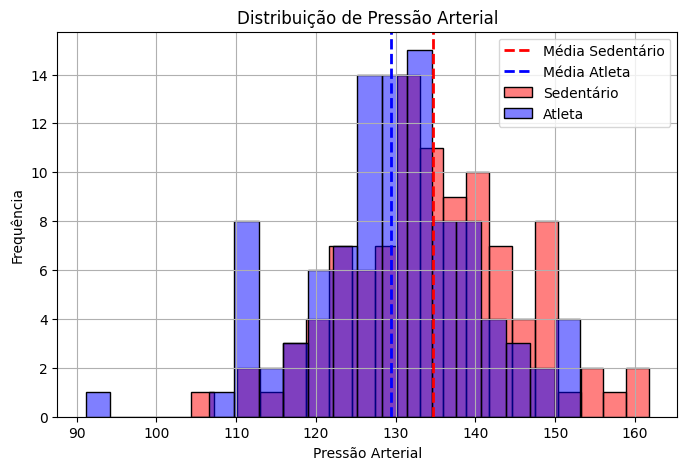

Hipotese alternativa e valida. Exercicio fisico diminui a pressao
T-stat = 2.0593266215069774 p_value = 0.04126342245429952


In [13]:
sedentario_pressao = np.random.normal(loc=135, scale=10, size=100)
atleta_pressao = np.random.normal(loc=128, scale=10, size=100)

plt.figure(figsize=(8, 5))
sns.histplot(sedentario_pressao, label='Sedentário', bins=20, alpha=0.5, color='red')
sns.histplot(atleta_pressao, label='Atleta', bins=20, alpha=0.5, color='blue')

plt.axvline(x=np.mean(sedentario_pressao), color='red', linestyle='dashed', linewidth=2, label='Média Sedentário')
plt.axvline(x=np.mean(atleta_pressao), color='blue', linestyle='dashed', linewidth=2, label='Média Atleta')
plt.grid(True)
plt.legend()
plt.title('Distribuição de Pressão Arterial')
plt.xlabel('Pressão Arterial')
plt.ylabel('Frequência')
plt.show()

if (p_value< 0.05):
    print('Hipotese alternativa e valida. Exercicio fisico diminui a pressao')
else:
    print('Hipotese nula e valida. Exercicio fisico nao altera a pressao')

print(f'T-stat = {t_stat} p_value = {p_value}')

      Poluição Cidade
0    42.315306      A
1    44.243390      A
2    43.038467      A
3    57.020254      A
4    55.210134      A
..         ...    ...
145  47.369650      C
146  64.358261      C
147  54.456748      C
148  53.929895      C
149  61.535811      C

[150 rows x 2 columns]
F_stat = 20.50965741126081
P_value = 1.3929735660814896e-08


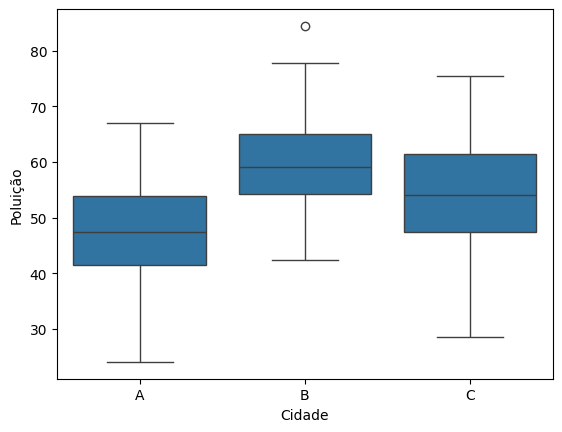

In [14]:
tam = 50
A = np.random.normal(loc=50, scale=10, size=50)
B = np.random.normal(loc=60, scale=10, size=50)
C = np.random.normal(loc=55, scale=10, size=50)

dfp = pd.DataFrame({
    'Poluição': np.concatenate([A, B, C]),
    'Cidade': ['A']*tam + ['B']*tam + ['C']*tam 
})

print(dfp)

grupos = [dfp[dfp['Cidade']==cidade]['Poluição'] for cidade in ['A', 'B', 'C']]


f_stat, p_value = stats.f_oneway(*grupos)

sns.boxplot(x='Cidade', y='Poluição', data=dfp)

print(f'F_stat = {f_stat}')
print(f'P_value = {p_value}')


['DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS', 'DDS'

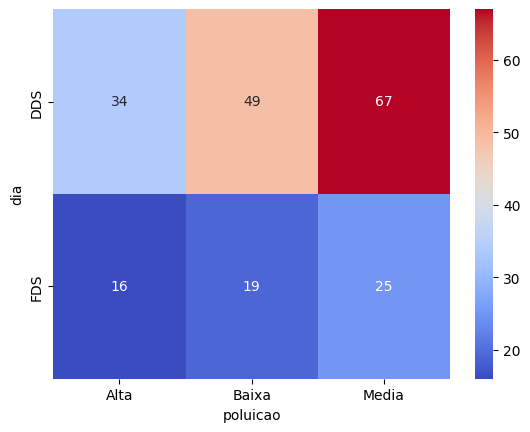

In [15]:
days = ['DDS'] *150 + ['FDS'] *60

poluicao = np.random.choice(['Baixa', 'Media', 'Alta'], size=210, p=[0.3,0.4,0.3])

print(days)

dfcat = pd.DataFrame({'dia':days, 'poluicao': poluicao})

cont = pd.crosstab(dfcat['dia'], dfcat['poluicao'])
sns.heatmap(cont, annot=True, cmap='coolwarm', fmt='d')

chi2_stat, p_value, dof, expected = stats.chi2_contingency(cont)

print(f'chi^2: {chi2_stat} p_value: {p_value}')
if (p_value <0.05):
    print('Hipotese alternativa e valida')
else:
    print('Hipotese nula e valida')
    

1) Faça um teste de hipótese para determinar se o final de semana influencia no nível de poluentes.

2) Teste a hipótese de que dias chuvosos afetam o nível de poluentes. Considere dias chuvosos como sendo aqueles que contenham pelo menos uma medida RH>85

3) Indique os possíveis testes de hipóteses que você pode realizar em seu projeto integrador.